# Detecting Cyberattacks In Industrial Control Systems: Ensemble Methods For Binary Classification Of Synchrophasor & Security Logs


## Introduction

This project utilizes Power System Attack Datasets produced by Mississippi State University and Oak Ridge National Laboratory (ORNL). The datasets contain security logs as well as electrical synchrophasor data.

 
The Dataset(s) README is available [here](http://www.ece.uah.edu/~thm0009/icsdatasets/PowerSystem_Dataset_README.pdf):<sup>[1]</sup>

* http://www.ece.uah.edu/~thm0009/icsdatasets/PowerSystem_Dataset_README.pdf


Links to download these & other Industrial Control System (ICS) cyberattack datasets [here](https://sites.google.com/a/uah.edu/tommy-morris-uah/ics-data-sets?authuser=1):<sup>[2]</sup>

* https://sites.google.com/a/uah.edu/tommy-morris-uah/ics-data-sets?authuser=1


## Background

Synchrophasors / Phasor Measurement Units (PMUs) use a common time source to synchronize measurements of electrical waves in an power grid.<sup>[3]</sup> 

These measurements sometimes present anomalous events, which may constitute cyberattacks.

Cyberattacks on power grids can take the form of data injections that mimic fault events, causing power to be erroneously shut down by sensors in the system.<sup>[4]</sup>

In the diagram below, G1 and G2 are power generators. R1 through R4 are Intelligent Electronic Devices (IEDs) that can switch the breakers on or off. 


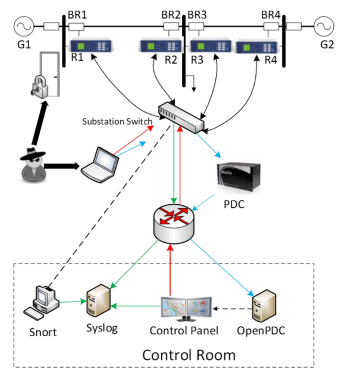

*[Image source](http://www.ece.uah.edu/~thm0009/icsdatasets/PowerSystem_Dataset_README.pdf) <sup>[1]</sup>*


The IEDs/breakers have no internal validation to detect whether fault events are valid or faked. Breakers can be shut off based on false data injections, resulting in malicious interruption of power.

Differentiating between real fault events and data injection attacks is thus vital to maintaining power grid operation.

The system from which these measurements were taken contains 4 PMUs measuring 29 features, which results in a total of 116 PMU measurement columns.

The dataset additionally contains [Snort](https://www.snort.org/) <sup>[5]</sup>  and simulated control panel logs.


## Methods

### Preprocessing

The dataset contains 2 target classes for binary classification, representing natural and attack scenarios. Where appropriate for the model, categorical data have been transformed to numerical values.


The full dataset contains 78,377 rows of data. Rows containing values that were either very large or very small (`np.inf`, `-np.inf`) were dropped, resulting in a final 72,073 rows of data.


### Model Training

**Non-ensemble Method: Gaussian Naive Bayes**

For comparison, a non-ensemble model--[Gaussian Naive Bayes (GNB)](https://scikit-learn.org/stable/modules/naive_bayes.html?highlight=gaussian+naive+bayes)--was trained on the data first.

Gaussian Naive Bayes prediction accuracy was **31.17%**.

**Ensemble Methods**

Models from five ensemble algorithm groups were trained. These included bagging, random forests, gradiant boosted decision trees, extreme gradient boosting (XGBoost), and histogram-based boosting.

The bagging method utilyzed a K-Neighbors classifier, while the remaining four models employed some form of decision tree-based classification.


* **Bagging methods** are "*a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions.*"<sup>[6]</sup> Bagging is an effective method to boost base model performance (without changing the underlying algorithm),<sup>[7]</sup> as well as reducing overfit tendencies.


* **Random Forests** is an algorithm based on randomized decision trees. It utilyzes a *perturb-and-combine* system specially designed for trees,<sup>[8]</sup> introducing randomness into the construction of each classifier.<sup>[9]</sup> The average of all classifiers is used to make predictions.


* **Gradient Tree Boosting** or **Gradient Boosted Decision Trees (GBDT)** is an ensemble method using multiple trees sequentially, each "learning" from the mistakes of previous trees. <sup>[10]</sup>  GBDT algorithms implement *shrinkage*, a regularization strategy that scales the contribution of each learner by some constant.<sup>[11]</sup> Overfit in `sklearn` GBDT can be moderated by scaling gradient descent step length using the `learning_rate` hyper-parameter. Because this parameter interacts closely with the number of learners that are fit, care should be taken when setting the number of estimators (trees).<sup>[12]</sup>


* [**XGBoost**](https://github.com/dmlc/xgboost) is an open-source implementation of GBDT algorithm.<sup>[13][14]</sup> 


* **Histogram-based gradient boosting** implementation in `sklearn` is similar to XGBoost and [LightGBM](https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html), and can be orders of magnitude faster than classical gradient boosting algorithms, when the number of samples is large.<sup>[15][16]</sup>



## Results

The winning model in terms of accuracy is Random Forests. Random Forests dramatically outperformed other methods, at **93.1%**.


Prediction accuracy for XGBoost was **83.01%**.


Bagging with K-Neighbors as estimator made predictions with **81.96%** accuracy.
 

The highest performing Gradient Boost model had the highest number of estimators, underscoring the effectiveness of ensemble methods on this dataset. This model also had the highest max tree depth. These results are in line with the high-dimensional nature of the data.

In fact, although a higher number of estimators tends to result in better results with GBDT, leaving the number of estimators unchanged at 400 while increasing maximum tree depth to 4 resulted in a seven point jump in accuracy, from 78.4% to 85.6%.

The increased tree depth came with training time increases, however. Resource usage was unscalable with predetermined computing constraints, so a faster histogram-based gradient boosting technique was applied. Prediction accuracy leveled off for this model at 92.19% after 4,000 iterations; a slight gain over 92.01% after 2,000 iterations. Based on these results, it is unlikely that additional training will result in dramatic accuracy improvement. 

## References


1. Power System Attack Datasets - Mississippi State University and Oak Ridge National Laboratory - 4/15/2014, 15 April 2014, http://www.ece.uah.edu/~thm0009/icsdatasets/PowerSystem_Dataset_README.pdf. Accessed 22 October 2022.


2. “Tommy Morris - Industrial Control System (ICS) Cyber Attack Datasets.” Google Sites, https://sites.google.com/a/uah.edu/tommy-morris-uah/ics-data-sets?authuser=1. Accessed 22 October 2022.


3. Knapp, Eric D. and Raj Samani. “Applied Cyber Security and the Smart Grid: Implementing Security Controls into the Modern Power Infrastructure.” (2013).


4. Unsal, Derya, Taha Selim Ustun, S. M. Suhail Hussain and Ahmet Onen. “Enhancing Cybersecurity in Smart Grids: False Data Injection and Its Mitigation.” Energies 14 (2021): 2657.


5. Snort - Network Intrusion Detection & Prevention System, https://www.snort.org/. Accessed 22 October 2022.


6. “1.11. Ensemble methods — scikit-learn 1.1.2 documentation: Bagging meta-estimator.” Scikit-learn, https://scikit-learn.org/stable/modules/ensemble.html?highlight=bagging#bagging-meta-estimator. Accessed 22 October 2022.


7. L. Breiman, “Bagging predictors”, Machine Learning, 24(2), 123-140, 1996.


8. Ensemble methods — scikit-learn 1.1.2 documentation: Forests of randomized trees.” Scikit-learn, https://scikit-learn.org/stable/modules/ensemble.html?highlight=random+forests#forests-of-randomized-trees“1.11. Accessed 22 October 2022.



9. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.


10. “1.11. Ensemble methods — scikit-learn 1.1.2 documentation: Gradient Boosting.” Scikit-learn, https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting. Accessed 22 October 2022.


11. Friedman, J.H. (2001). Greedy function approximation: A gradient boosting machine. Annals of Statistics, 29, 1189-1232.


12. “1.11. Ensemble methods — scikit-learn 1.1.2 documentation: Gradient Boosting--Shrinkage.” Scikit-learn, https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting-shrinkage. Accessed 22 October 2022.


13. Tianqi Chen and Carlos Guestrin. XGBoost: A Scalable Tree Boosting System. In 22nd SIGKDD Conference on Knowledge Discovery and Data Mining, 2016


14. “Scalable, Portable and Distributed Gradient Boosting (GBDT, GBRT or GBM) Library, for Python, R, Java, Scala, C++ and more. Runs on single machine, Hadoop, Spark, Dask, Flink and DataFlow.” GitHub, https://github.com/dmlc/xgboost. Accessed 22 October 2022.


15. “1.11. Ensemble methods — scikit-learn 1.1.2 documentation: Histogram Based Gradient Boosting.” Scikit-learn, https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting. Accessed 22 October 2022


16. Ke et. al. “LightGBM: A Highly Efficient Gradient Boosting Decision Tree”



In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df_1 = pd.read_csv('sg_data/data1.csv')

In [3]:
df_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,Natural
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,28.229631,130882.4694,-91.730543,130882.4694,148.264289,130957.6892,25.553918,459.42299,-95.683952,466.93050,...,0,0,0,0,0,0,0,0,0,Natural
4962,28.195253,130957.6892,-91.770650,130932.6159,148.224182,131032.9090,25.267439,460.70476,-95.752707,467.66294,...,0,0,0,0,0,0,0,0,0,Natural
4963,28.000447,131057.9823,-91.971185,131057.9823,148.035105,131133.2021,24.316329,464.36696,-96.251180,468.94471,...,0,0,0,0,0,0,0,0,0,Natural
4964,27.971800,131083.0556,-91.994104,131057.9823,148.006458,131133.2021,24.259033,464.18385,-96.314205,469.12782,...,0,0,0,0,0,0,0,0,0,Natural


In [3]:
csv_list = ['data1.csv','data2.csv','data3.csv','data4.csv',
           'data5.csv','data6.csv','data7.csv','data8.csv',
           'data9.csv','data10.csv','data11.csv','data12.csv',
           'data13.csv','data14.csv','data15.csv']


In [4]:
# create function 

def read_in_CSVs(csv_list, file_path, new_csv_name):
    '''
    reads in a list of csv filenames
    concats with supplied filepath
    opens full file name as DataFrame
    concats all DataFrames
    exports full dataset as CSV to operating folder
    returns full dataset as DataFrame in memory
    
    '''
    
    data = pd.DataFrame()
    
    for csv_name in csv_list:
        
        full_name = file_path + csv_name
        
        df = pd.read_csv(full_name)
        
        data = pd.concat([data, df])
        
    data.to_csv(new_csv_name, index=False)
    
    return data
    

In [5]:
data = read_in_CSVs(csv_list, 'sg_data/', 'data.csv')

data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,Natural
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
5272,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
5273,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
5274,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural


In [6]:
# get counts 

data['marker'].value_counts()

Attack     55663
Natural    22714
Name: marker, dtype: int64

In [7]:
data.shape

(78377, 129)

## Prepare Training & Test Sets

### Finding np.inf Values

In [8]:
data.iloc[data.values==np.inf]

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
738,-179.931666,134367.6539,60.097543,134342.5807,-59.908467,134442.8737,0.000000,0.00000,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,Attack
739,-177.691401,133690.6756,62.337808,133665.6024,-57.662472,133765.8955,0.000000,0.00000,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,Attack
753,122.607239,135872.0501,2.635606,135872.0501,-117.364675,135947.2699,0.000000,0.00000,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,Attack
777,-69.064333,137426.5929,170.947688,137401.5196,50.976055,137526.8860,0.000000,0.00000,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,Attack
778,-57.393182,136749.6146,-177.376274,136724.5413,62.635746,136849.9077,0.000000,0.00000,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,137.315065,133590.3826,17.337703,133540.2360,-102.668307,133640.5291,0.000000,0.00000,0.000000,0.00000,...,0,1,1,0,0,0,0,0,0,Natural
5246,-96.910081,133816.0420,143.113398,133765.8955,23.113117,133891.2618,0.000000,0.00000,0.000000,0.00000,...,0,1,1,0,0,0,0,0,0,Natural
5246,-96.910081,133816.0420,143.113398,133765.8955,23.113117,133891.2618,0.000000,0.00000,0.000000,0.00000,...,0,1,1,0,0,0,0,0,0,Natural
5247,-95.426121,135796.8303,144.580170,135746.6838,24.780425,136072.6363,-5.867088,66.65204,-124.635509,65.55338,...,0,0,1,0,0,0,0,0,0,Natural


In [9]:
drop_na = data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

drop_na

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,Natural
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
5272,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
5273,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
5274,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural


In [10]:
drop_na.iloc[drop_na.values==np.inf]

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker


### Divide into X and y

In [11]:
X = drop_na.drop('marker', axis=1)

y = drop_na['marker']

In [12]:
X

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,0
5272,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,0
5273,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,0
5274,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0       Natural
1       Natural
2       Natural
3       Natural
4       Natural
         ...   
5271    Natural
5272    Natural
5273    Natural
5274    Natural
5275    Natural
Name: marker, Length: 72073, dtype: object

### train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

## Model Training

### Gaussian Naive Bayes 

In [16]:
gnb_1 = GaussianNB()

gnb_1_pred = gnb_1.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, gnb_1_pred)

print('accuracy: %.2f%%' % (accuracy * 100.0))

accuracy: 31.18%


In [17]:
gnb1_correct = (gnb_1_pred == y_test).sum()

print((gnb1_correct / y_test.shape[0]) * 100)

31.17585848074922


### XGBoost 1

XGBClassifier requires `0`,`1` values for target.

Transform:

In [18]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)

y_test_encoded = encoder.fit_transform(y_test)


In [19]:
print(y_train_encoded)
print(y_test_encoded)
print(len(y_train))
print(len(y_train_encoded))
print(len(y_test))
print(len(y_test_encoded))

[0 1 0 ... 0 0 0]
[1 0 0 ... 1 0 0]
57658
57658
14415
14415


Instantiate & train the classifier:

In [26]:
xgb_1 = XGBClassifier()

xgb_1_pred = xgb_1.fit(X_train, y_train_encoded).predict(X_test)

In [27]:
correct = (xgb_1_pred == y_test_encoded).sum()

print(correct)

11966


In [28]:
print('accuracy: ', (correct / y_test_encoded.shape[0] * 100))

accuracy:  83.01075268817203


### Random Forests 

In [30]:
rfc_1 = RandomForestClassifier()

rfc_1_pred = rfc_1.fit(X_train, y_train).predict(X_test)

In [32]:
correct = (rfc_1_pred == y_test).sum()

print('number correct: ', correct)

print('total: ', y_test.shape[0])

print('accuracy: ', (correct / y_test.shape[0]) * 100)

number correct:  13421
total:  14415
accuracy:  93.10440513354145


### Bagging


In [28]:
bc_1 = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bc_1_pred = bc_1.fit(X_train, y_train).predict(X_test)

In [29]:
correct = (bc_1_pred == y_test).sum()

print('number correct: ', correct)

print('total: ', y_test.shape[0])

print('accuracy: ', (correct / y_test.shape[0]) * 100)

number correct:  11815
total:  14415
accuracy:  81.96323274366979


### Gradient Boosting

In [35]:
gb_1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
gb_1.score(X_test, y_test)

0.7303503295178634

In [43]:
gb_3 = GradientBoostingClassifier(n_estimators=400, learning_rate=1.0,max_depth=2, random_state=29).fit(X_train, y_train)
gb_3.score(X_test, y_test)

0.7848074921956295

In [44]:
gb_3 = GradientBoostingClassifier(n_estimators=400, learning_rate=1.0,max_depth=4, random_state=29).fit(X_train, y_train)
gb_3.score(X_test, y_test)

0.8566077003121748

### Histogram-based Gradient Boosting

In [50]:
hbgb_1 = HistGradientBoostingClassifier(max_iter=400).fit(X_train, y_train)

hbgb_1.score(X_test, y_test)

0.8665279223031565

In [52]:
hbgb_2 = HistGradientBoostingClassifier(max_iter=2000).fit(X_train, y_train)

hbgb_2.score(X_test, y_test)

0.9201526187998612

In [60]:
hbgb_3 = HistGradientBoostingClassifier(max_iter=4000).fit(X_train, y_train)

hbgb_3.score(X_test, y_test)

0.9219562955254943